In [177]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
import numpy as np
import random
tf.disable_v2_behavior()

In [178]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data =[[0],[0],[0],[1],[1],[1]]

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=33)

In [180]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [181]:
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [182]:
H = tf.sigmoid(tf.matmul(X, W)+b)

In [183]:
cost = -tf.reduce_mean(Y*tf.log(H)+(1-Y)*(tf.log(1-H)))

In [219]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

In [220]:
train = optimizer.minimize(cost)

In [221]:
sess = tf.Session()

In [222]:
sess.run(tf.global_variables_initializer())

In [223]:
steps = []
costs = []

In [224]:
for step in range(20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_train, Y:Y_train})
    if step % 500 == 0:
        steps.append(step)
        costs.append(cost_val)
        print (step, "Cost: {:.3f}".format(cost_val))

0 Cost: 7.056
500 Cost: 6.679
1000 Cost: 6.302
1500 Cost: 5.926
2000 Cost: 5.550
2500 Cost: 5.176
3000 Cost: 4.802
3500 Cost: 4.430
4000 Cost: 4.060
4500 Cost: 3.694
5000 Cost: 3.332
5500 Cost: 2.977
6000 Cost: 2.630
6500 Cost: 2.296
7000 Cost: 1.980
7500 Cost: 1.688
8000 Cost: 1.430
8500 Cost: 1.214
9000 Cost: 1.046
9500 Cost: 0.923
10000 Cost: 0.840
10500 Cost: 0.786
11000 Cost: 0.751
11500 Cost: 0.729
12000 Cost: 0.714
12500 Cost: 0.705
13000 Cost: 0.698
13500 Cost: 0.693
14000 Cost: 0.690
14500 Cost: 0.687
15000 Cost: 0.685
15500 Cost: 0.683
16000 Cost: 0.681
16500 Cost: 0.680
17000 Cost: 0.678
17500 Cost: 0.677
18000 Cost: 0.675
18500 Cost: 0.674
19000 Cost: 0.673
19500 Cost: 0.671
20000 Cost: 0.670


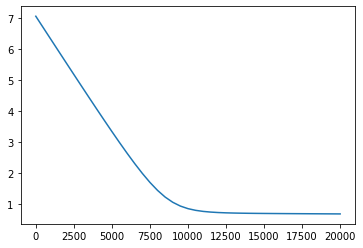

In [225]:
plt.plot(steps, costs)

In [227]:
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [233]:
hypo_val, predict_val, acc_val = sess.run([H, predicted, accuracy], feed_dict={X:X_test, Y:Y_test})
print("\nHypothesis : ", hypo_val, "\nCorrect(Y) : ", predict_val, "\nAccuracy : ", acc_val)


Hypothesis :  [[0.7591784 ]
 [0.58917546]] 
Correct(Y) :  [[1.]
 [1.]] 
Accuracy :  0.5
